In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import exploface as ef

In [2]:
def make_empty_df():
    timestamp = np.arange(0,20, 0.1)
    confidence = timestamp*0+1
    success = confidence
    data = {"timestamp": timestamp, "confidence":confidence, "success":success}

    some_AU_labels = ["AU01_",
                        "AU02_",
                        "AU04_",
                        "AU05_",
                        "AU06_",
                        "AU07_",
                        "AU09_",
                        "AU10_",
                        "AU12_",
                        "AU14_",
                        "AU15_",
                        "AU17_",
                        "AU20_",
                        "AU23_",
                        "AU25_",
                        "AU26_",
                        "AU28_",
                        "AU45_",
                     ]

    for l in some_AU_labels:
        data.update({l+"r": timestamp*0}) # For intensity of AUs
        data.update({l+"c": timestamp*0}) # For detection of AUs

    return pd.DataFrame(data)

### DATA FOR TestForGettingActivationTimesWithThreshold()

In [3]:
basic_df = make_empty_df()
basic_df.to_csv("detect_no_emotion.csv")
basic_df.head()

,AU01_c,AU01_r,AU02_c,AU02_r,AU04_c,AU04_r,AU05_c,AU05_r,AU06_c,AU06_r,...,AU25_r,AU26_c,AU26_r,AU28_c,AU28_r,AU45_c,AU45_r,confidence,success,timestamp
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.4


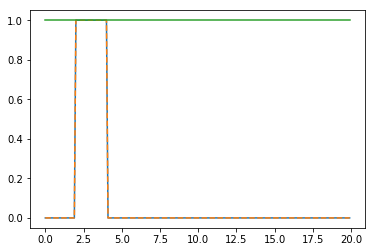

In [4]:
basic_df["AU01_r"].mask((basic_df["timestamp"] >= 2) & (basic_df["timestamp"] <= 4), 1, inplace=True)
basic_df["AU01_c"].mask((basic_df["timestamp"] >= 2) & (basic_df["timestamp"] <= 4), 1, inplace=True)
plt.plot(basic_df["timestamp"], basic_df["AU01_r"])
plt.plot(basic_df["timestamp"], basic_df["AU01_c"], "--")
plt.plot(basic_df["timestamp"], basic_df["confidence"])
plt.show()
basic_df.to_csv("detect_AU01_r_time2_4.csv")

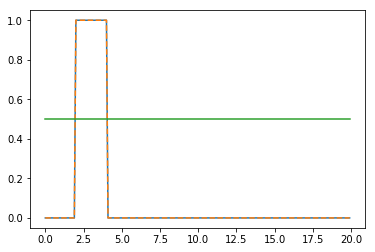

In [7]:
basic_df["AU01_r"].mask((basic_df["timestamp"] >= 2) & (basic_df["timestamp"] <= 4), 1, inplace=True)
basic_df["confidence"] = basic_df["confidence"]*0+0.5#.mask((basic_df["timestamp"] >= 2) & (basic_df["timestamp"] <= 4), 0, inplace=True)
#basic_df["success"] = basic_df["success"]*0
plt.plot(basic_df["timestamp"], basic_df["AU01_r"])
plt.plot(basic_df["timestamp"], basic_df["AU01_c"], "--")
plt.plot(basic_df["timestamp"], basic_df["confidence"])

plt.show()
basic_df.to_csv("detect_AU01_r_time2_4_confidenceLow.csv")

### DATA FOR time_threshold AND time_gap_smoothing

0.3 0.5
4.2 4.4
10.7 10.899999999999999


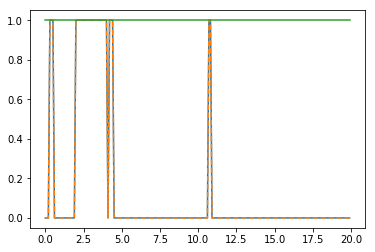

In [8]:
basic_df = make_empty_df()
#basic_df.head()
interval_length = 0.2
basic_df["AU01_r"].mask((basic_df["timestamp"] >= 2) & (basic_df["timestamp"] <= 4), 1, inplace=True)
basic_df["AU01_c"].mask((basic_df["timestamp"] >= 2) & (basic_df["timestamp"] <= 4), 1, inplace=True)
for i in [0.3, 4.2, 10.7]:
    print(i, i+interval_length)
    basic_df["AU01_r"].mask((basic_df["timestamp"] >= i) & (basic_df["timestamp"] <= i+interval_length), 1, inplace=True)
    basic_df["AU01_c"].mask((basic_df["timestamp"] >= i) & (basic_df["timestamp"] <= i+interval_length), 1, inplace=True)
basic_df[(basic_df["timestamp"]>1.5) & (basic_df["timestamp"]<6.)]
basic_df.to_csv("detect_AU01_r_with_to_smooth_intervals.csv")
plt.plot(basic_df["timestamp"], basic_df["AU01_r"])
plt.plot(basic_df["timestamp"], basic_df["AU01_c"], "--")
plt.plot(basic_df["timestamp"], basic_df["confidence"])

plt.show()

#basic_df[basic_df["timestamp"]>9]

## More complicated continuous case

In [12]:
import random
basic_df = make_empty_df()
#basic_df.head()

basic_df["AU01_r"].mask((basic_df["timestamp"] >= 2) & (basic_df["timestamp"] <= 4), 5, inplace=True)
basic_df["AU01_r"].mask((basic_df["timestamp"] >= 4) & (basic_df["timestamp"] <= 8), 2, inplace=True)
basic_df["AU01_r"].mask((basic_df["timestamp"] >= 14) & (basic_df["timestamp"] <= 18), 4, inplace=True)

basic_df["AU01_c"].mask((basic_df["timestamp"] >= 2) & (basic_df["timestamp"] <= 4), 1, inplace=True)
basic_df["AU01_c"].mask((basic_df["timestamp"] >= 4) & (basic_df["timestamp"] <= 8), 1, inplace=True)
basic_df["AU01_c"].mask((basic_df["timestamp"] >= 14) & (basic_df["timestamp"] <= 18), 1, inplace=True)

moments = np.random.rand(10)*20
lengths = np.random.rand(10)*0.4

fall_out_moments = np.random.rand(10)*20
fall_out_lengths = np.random.rand(10)*0.2

for i, l in zip(moments, lengths):
    print(round(i,2), round(l,2))
    basic_df["AU01_r"].mask((basic_df["timestamp"] >= i) & (basic_df["timestamp"] <= i+interval_length), 5, inplace=True)
    basic_df["AU01_c"].mask((basic_df["timestamp"] >= i) & (basic_df["timestamp"] <= i+interval_length), 1, inplace=True)
for i, l in zip(fall_out_moments, fall_out_lengths):
    print(round(i,2), round(l,2))
    basic_df["AU01_r"].mask((basic_df["timestamp"] >= i) & (basic_df["timestamp"] <= i+interval_length), 0, inplace=True)
    basic_df["AU01_c"].mask((basic_df["timestamp"] >= i) & (basic_df["timestamp"] <= i+interval_length), 0, inplace=True)
basic_df[(basic_df["timestamp"]>1.5) & (basic_df["timestamp"]<6.)]
basic_df.to_csv("detect_AU01_r_with_to_smooth_intervals_ex2.csv")


#basic_df[basic_df["timestamp"]>9]

8.49 0.34
17.41 0.33
6.61 0.28
0.97 0.13
17.77 0.17
6.1 0.24
0.37 0.26
7.68 0.4
8.31 0.36
7.27 0.12
5.49 0.02
16.81 0.2
16.02 0.17
14.33 0.06
4.85 0.09
2.2 0.18
12.22 0.13
0.66 0.2
16.78 0.13
16.57 0.08


In [13]:
# This is what you detection using getActivationTimes
AU_intervals = ef.extraction.getActivationTimes(basic_df, "AU01_r", 
                                    smooth_over_time_interval = 0.5, 
                                    threshold=3, method="threshold")

print(AU_intervals)


[[0.4, 1.1], [2.0, 3.9], [6.2, 7.8], [14.0, 16.5], [17.1, 18.0]]


In [15]:
# This is what you get with get_activation_dataframe
# This uses the feature_detected as a measure of if the feature is detected.
AU01_r_results = ef.extraction.get_activation_dataframe(basic_df, 
                                             feature_detected="AU01_c", 
                                             feature_intensity="AU01_r", 
                                             smooth_over_time_interval=0.5)#, threshold=1, threshold_method="threshold")
AU01_r_results

,start,end,mean_intensity,std_intensity,mean_confidence,duration
0,0.4,1.1,1.666667,2.581989,1.0,0.7
1,2.0,8.6,2.969231,1.845342,1.0,6.6
2,14.0,16.5,3.333333,1.522774,1.0,2.5
3,17.1,18.0,4.500000,0.534522,1.0,0.9


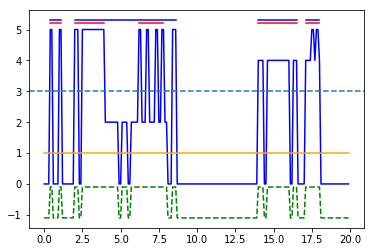

In [18]:

plt.plot(basic_df["timestamp"], basic_df["AU01_r"], "b")
plt.plot(basic_df["timestamp"], basic_df["AU01_c"]-1.1, "--", color="green")
plt.plot(basic_df["timestamp"], basic_df["confidence"], "orange")

for t in AU_intervals:
    plt.plot(t, [5.2,5.2], color="r")
    
for t in zip(AU01_r_results["start"], AU01_r_results["end"]):
    plt.plot(t, [5.3,5.3], color="b")
    
    
    
plt.axhline(3, linestyle="--")
plt.show()